In [1]:
path = 'datasets/anime-sequel-ratings.csv'

In [25]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv(path)

In [5]:
df = df.rename(columns={
    'Unnamed: 0': 'index',
    'First Season': 's1_title',
    'first season MAL rating': 's1_rating',
    'Second Season': 's2_title',
    'second season MAL rating': 's2_rating',
}).drop(columns=['index'])

In [6]:
df

,s1_title,s1_rating,s2_title,s2_rating
0,Re:ZERO -Starting Life in Another World-,8.25,Re:ZERO -Starting Life in Another World- Season 2,8.37
1,86 Eighty Six,8.24,86 Eighty-Six Part 2,8.72
2,Attack on Titan,8.53,Attack on Titan Season 2,8.50
3,Mushoku Tensei: Jobless Reincarnation,8.37,Mushoku Tensei: Jobless Reincarnation Part 2,8.75
4,Food Wars! Shokugeki no Soma,8.18,Food Wars! The Second Plate,8.11
5,Bakuman.,8.20,Bakuman Season 2,8.36
6,My Teen Romantic Comedy SNAFU,8.02,My Teen Romantic Comedy SNAFU TOO!,8.23
7,March Comes In Like a Lion,8.39,March Comes In Like A Lion 2nd Season,8.96
8,Kono Oto Tomare!: Sounds of Life,7.91,Kono Oto Tomare!: Sounds of Life Season 2,8.43
9,KonoSuba: God's Blessing on This Wonderful World!,8.12,KonoSuba: God's Blessing on This Wonderful Wor...,8.28


In [11]:
df['season_diff'] = df['s2_rating'] - df['s1_rating']

In [8]:
df['season_diff'].mean()

0.27066666666666683

In [10]:
df['season_diff_percent'] = (df['season_diff'] / df['s1_rating'] * 100)

In [12]:
df['season_diff_percent'].mean()

3.3465306046168877

In [13]:
df['s2_higher'] = df['season_diff'] > 0

In [14]:
df['s2_higher'].sum()

28

In [15]:
df.shape[0] - df['s2_higher'].sum()

2

In [16]:
df['season_diff'].std()

0.16404232703016397

Is this statistically significant?

In [17]:
from scipy.stats import ttest_ind

In [18]:
ttest_ind(df['s1_rating'], df['s2_rating'])

Ttest_indResult(statistic=-4.668538702748241, pvalue=1.8395055687801778e-05)

Boxplot will help show the difference

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

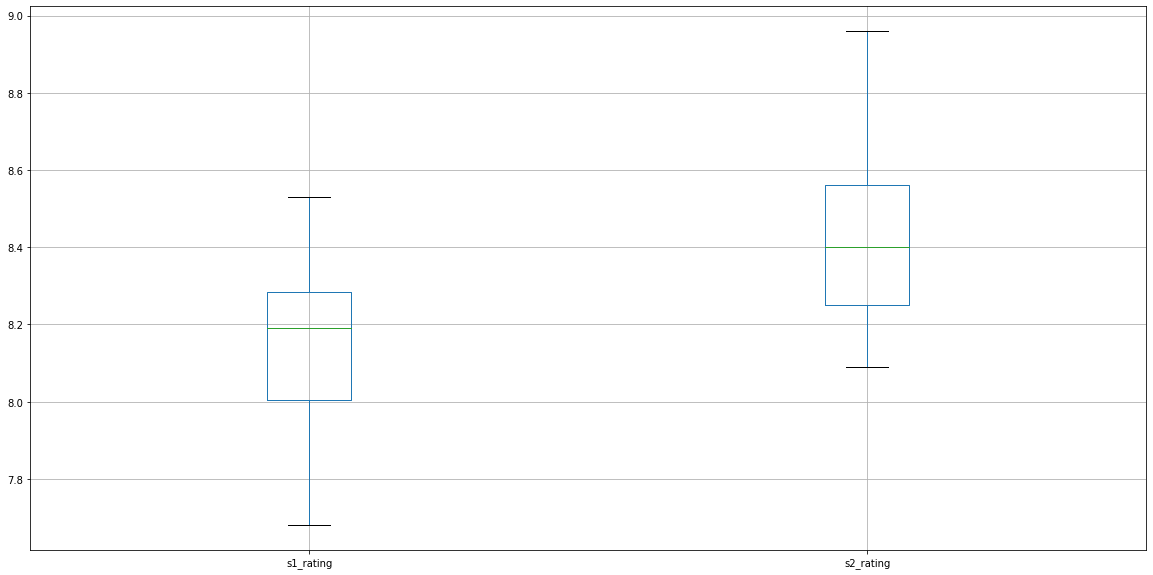

In [20]:
fig = df[['s1_rating', 's2_rating']].boxplot()

Reshape the data for a pretty plot

In [21]:
s1_df = df[['s1_title', 's1_rating']].copy().rename(columns={
    's1_title': 'title',
    's1_rating': 'rating'
})
s1_df['season'] = 'season 1'
# s1_df

In [22]:
s2_df = df[['s1_title', 's2_rating']].copy().rename(columns={
#     note: I keep the season 1 title here deliberately
    's1_title': 'title',
    's2_rating': 'rating'
})
s2_df['season'] = 'season 2'
# s2_df

In [31]:
show_df = pd.concat([s1_df, s2_df]).reset_index(drop=True)
show_df

,title,rating,season
0,Re:ZERO -Starting Life in Another World-,8.25,season 1
1,86 Eighty Six,8.24,season 1
2,Attack on Titan,8.53,season 1
3,Mushoku Tensei: Jobless Reincarnation,8.37,season 1
4,Food Wars! Shokugeki no Soma,8.18,season 1
5,Bakuman.,8.20,season 1
6,My Teen Romantic Comedy SNAFU,8.02,season 1
7,March Comes In Like a Lion,8.39,season 1
8,Kono Oto Tomare!: Sounds of Life,7.91,season 1
9,KonoSuba: God's Blessing on This Wonderful World!,8.12,season 1


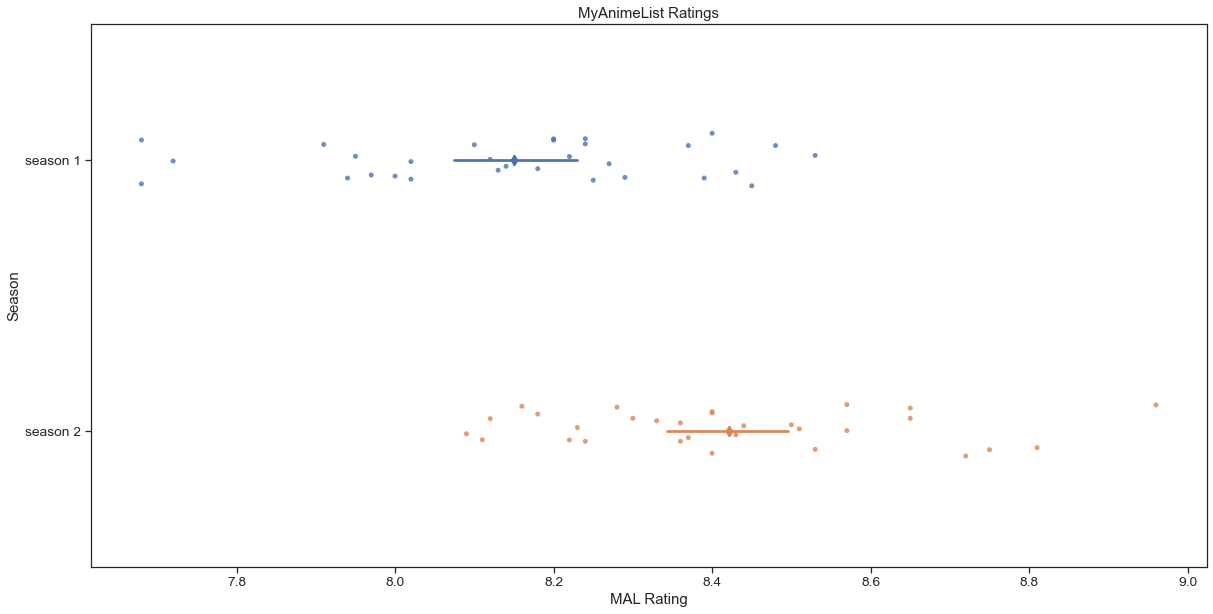

In [32]:
sns.reset_orig()
sns.set_theme(style="ticks", color_codes=True)
sns.set_context('notebook', font_scale=1.25)
sns.stripplot(x='rating', y='season', data=show_df, alpha=.8, hue='season')
sns.pointplot(x='rating', y='season', data=show_df, join=False, markers='d', hue='season')

plt.legend([], [], frameon=False)
plt.title('MyAnimeList Ratings')
plt.xlabel('MAL Rating')
plt.ylabel('Season')
plt.show()

In [33]:
df['adjusted_s2_rating'] = (df['s2_rating'] - df['season_diff'].mean()).round(2)
df

,s1_title,s1_rating,s2_title,s2_rating,season_diff,season_diff_percent,s2_higher,adjusted_s2_rating
0,Re:ZERO -Starting Life in Another World-,8.25,Re:ZERO -Starting Life in Another World- Season 2,8.37,0.12,1.454545,True,8.10
1,86 Eighty Six,8.24,86 Eighty-Six Part 2,8.72,0.48,5.825243,True,8.45
2,Attack on Titan,8.53,Attack on Titan Season 2,8.50,-0.03,-0.351700,False,8.23
3,Mushoku Tensei: Jobless Reincarnation,8.37,Mushoku Tensei: Jobless Reincarnation Part 2,8.75,0.38,4.540024,True,8.48
4,Food Wars! Shokugeki no Soma,8.18,Food Wars! The Second Plate,8.11,-0.07,-0.855746,False,7.84
5,Bakuman.,8.20,Bakuman Season 2,8.36,0.16,1.951220,True,8.09
6,My Teen Romantic Comedy SNAFU,8.02,My Teen Romantic Comedy SNAFU TOO!,8.23,0.21,2.618454,True,7.96
7,March Comes In Like a Lion,8.39,March Comes In Like A Lion 2nd Season,8.96,0.57,6.793802,True,8.69
8,Kono Oto Tomare!: Sounds of Life,7.91,Kono Oto Tomare!: Sounds of Life Season 2,8.43,0.52,6.573957,True,8.16
9,KonoSuba: God's Blessing on This Wonderful World!,8.12,KonoSuba: God's Blessing on This Wonderful Wor...,8.28,0.16,1.970443,True,8.01


In [34]:
(df['adjusted_s2_rating'] > df['s1_rating']).sum()

14

In [35]:
df['adj_season_diff'] = df['adjusted_s2_rating'] - df['s1_rating']

In [36]:
df.sort_values(by='adj_season_diff', ascending=False)

,s1_title,s1_rating,s2_title,s2_rating,season_diff,season_diff_percent,s2_higher,adjusted_s2_rating,adj_season_diff
7,March Comes In Like a Lion,8.39,March Comes In Like A Lion 2nd Season,8.96,0.57,6.793802,True,8.69,0.30
8,Kono Oto Tomare!: Sounds of Life,7.91,Kono Oto Tomare!: Sounds of Life Season 2,8.43,0.52,6.573957,True,8.16,0.25
18,Aria the Animation,7.68,Aria the Natural,8.18,0.50,6.510417,True,7.91,0.23
1,86 Eighty Six,8.24,86 Eighty-Six Part 2,8.72,0.48,5.825243,True,8.45,0.21
13,Non Non Biyori,7.95,Non Non Biyori Nonstop,8.40,0.45,5.660377,True,8.13,0.18
17,The Quintessential Quintuplets,7.68,The Quintessential Quintuplets 2,8.12,0.44,5.729167,True,7.85,0.17
15,Assassination Classroom,8.10,Assassination Classroom Second Season,8.51,0.41,5.061728,True,8.24,0.14
23,Kingdom,7.97,Kingdom: Season 2,8.36,0.39,4.893350,True,8.09,0.12
3,Mushoku Tensei: Jobless Reincarnation,8.37,Mushoku Tensei: Jobless Reincarnation Part 2,8.75,0.38,4.540024,True,8.48,0.11
29,Teasing Master Takagi-san,7.72,Teasing Master Takagi-san 2,8.09,0.37,4.792746,True,7.82,0.10


In [37]:
adj_s2_df = df[['s1_title', 'adjusted_s2_rating']].rename(columns={
    's1_title': 'title',
    'adjusted_s2_rating': 'rating'
})
adj_s2_df['season'] = 'season 2 (adjusted)'
adj_df = pd.concat([s1_df, adj_s2_df]).reset_index(drop=True)
adj_df

,title,rating,season
0,Re:ZERO -Starting Life in Another World-,8.25,season 1
1,86 Eighty Six,8.24,season 1
2,Attack on Titan,8.53,season 1
3,Mushoku Tensei: Jobless Reincarnation,8.37,season 1
4,Food Wars! Shokugeki no Soma,8.18,season 1
5,Bakuman.,8.20,season 1
6,My Teen Romantic Comedy SNAFU,8.02,season 1
7,March Comes In Like a Lion,8.39,season 1
8,Kono Oto Tomare!: Sounds of Life,7.91,season 1
9,KonoSuba: God's Blessing on This Wonderful World!,8.12,season 1


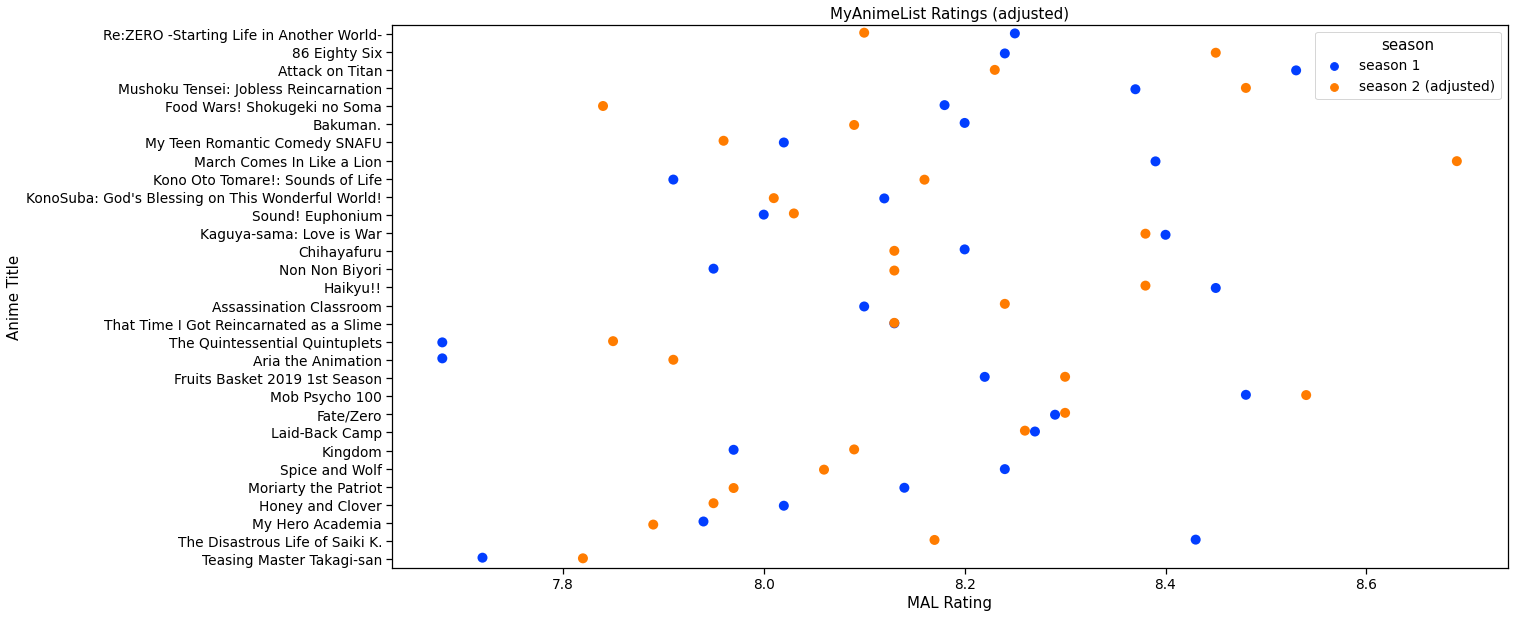

In [38]:
sns.reset_orig()
# sns.color_palette('bright')
sns.set_palette('bright')
sns.set_context('notebook', font_scale=1.25)
sns.stripplot(x='rating', y='title', data=adj_df, hue='season', size=10.)

plt.title('MyAnimeList Ratings (adjusted)')
plt.xlabel('MAL Rating')
plt.ylabel('Anime Title')
plt.show()

In [39]:
df.sort_values(by='s1_rating', ascending=False)

,s1_title,s1_rating,s2_title,s2_rating,season_diff,season_diff_percent,s2_higher,adjusted_s2_rating,adj_season_diff
2,Attack on Titan,8.53,Attack on Titan Season 2,8.50,-0.03,-0.351700,False,8.23,-0.30
20,Mob Psycho 100,8.48,Mob Psycho 100 II,8.81,0.33,3.891509,True,8.54,0.06
14,Haikyu!!,8.45,Haikyu!! 2nd Season,8.65,0.20,2.366864,True,8.38,-0.07
28,The Disastrous Life of Saiki K.,8.43,The Disastrous Life of Saiki K. 2,8.44,0.01,0.118624,True,8.17,-0.26
11,Kaguya-sama: Love is War,8.40,Kaguya-sama: Love is War Season 2,8.65,0.25,2.976190,True,8.38,-0.02
7,March Comes In Like a Lion,8.39,March Comes In Like A Lion 2nd Season,8.96,0.57,6.793802,True,8.69,0.30
3,Mushoku Tensei: Jobless Reincarnation,8.37,Mushoku Tensei: Jobless Reincarnation Part 2,8.75,0.38,4.540024,True,8.48,0.11
21,Fate/Zero,8.29,Fate/Zero Season 2,8.57,0.28,3.377563,True,8.30,0.01
22,Laid-Back Camp,8.27,Laid-Back Camp Season 2,8.53,0.26,3.143894,True,8.26,-0.01
0,Re:ZERO -Starting Life in Another World-,8.25,Re:ZERO -Starting Life in Another World- Season 2,8.37,0.12,1.454545,True,8.10,-0.15


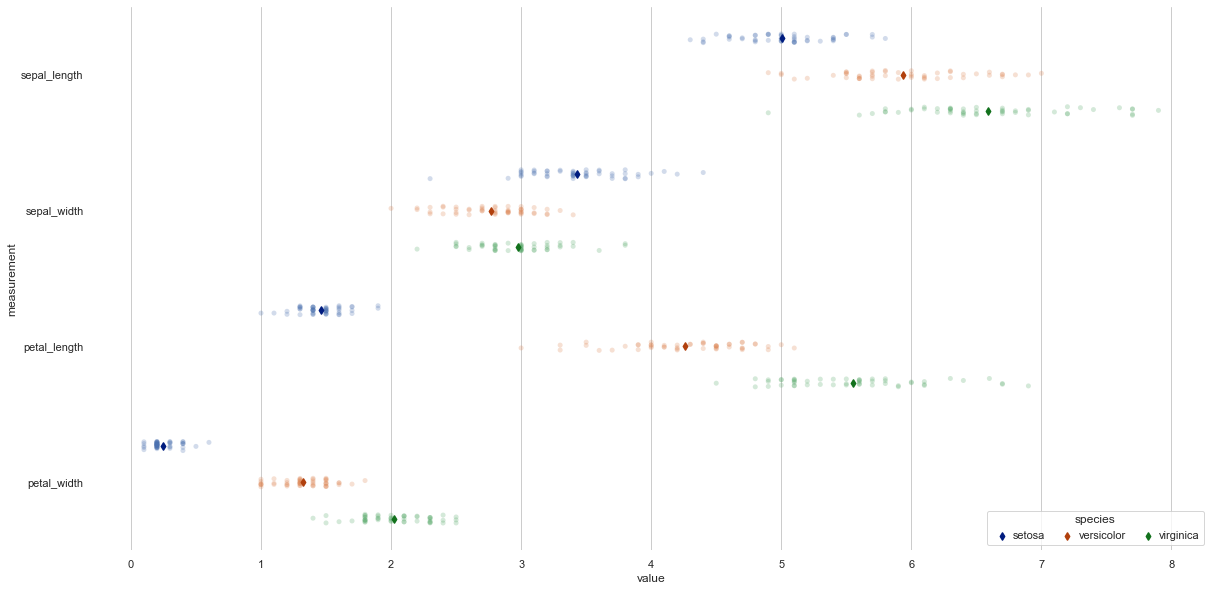

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

In [112]:
iris

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


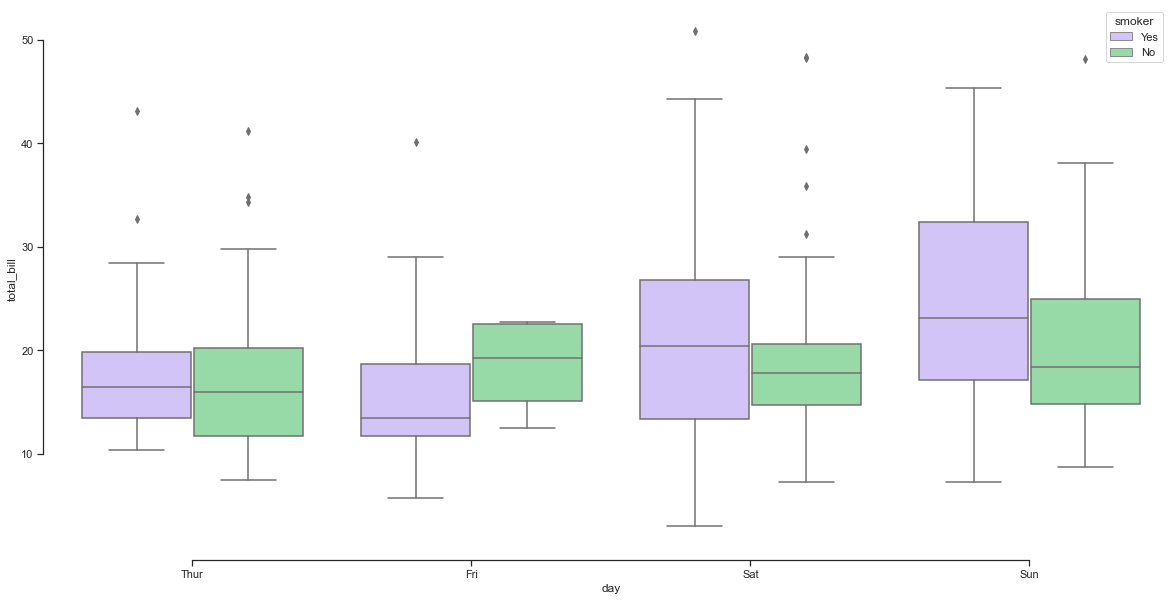

In [116]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [117]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
